In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
 df_original=pd.read_csv('../data_v3/감성점수와 일별뉴스 합친거.csv',encoding='utf-8')

In [4]:
df_original_minmax=df_original[['경락단가_평균','day_sentiment']]

In [5]:
scaler = MinMaxScaler(feature_range=(0,1)) ## 각 칼럼 데이터 값을 0~3 범위로 변환
scaler.fit(df_original_minmax) ## 각 칼럼 데이터마다 변환할 함수 생성
transformed_X = scaler.transform(df_original_minmax) ## fit에서 만들어진 함수를 실제로 데이터에 적용
print(transformed_X)

[[0.36001635 0.5       ]
 [0.31522105 0.5       ]
 [0.34802067 0.44791667]
 ...
 [0.47671085 0.44186508]
 [0.4863046  0.44186508]
 [0.44565048 0.44186508]]


In [6]:
df=pd.DataFrame(transformed_X)

In [7]:
df.columns=['도매가격','day_sentiment']

In [8]:
df_all = pd.concat([df_original["판정일"], df],axis=1)

In [9]:
df_all['판정일']=pd.to_datetime(df_all['판정일'])

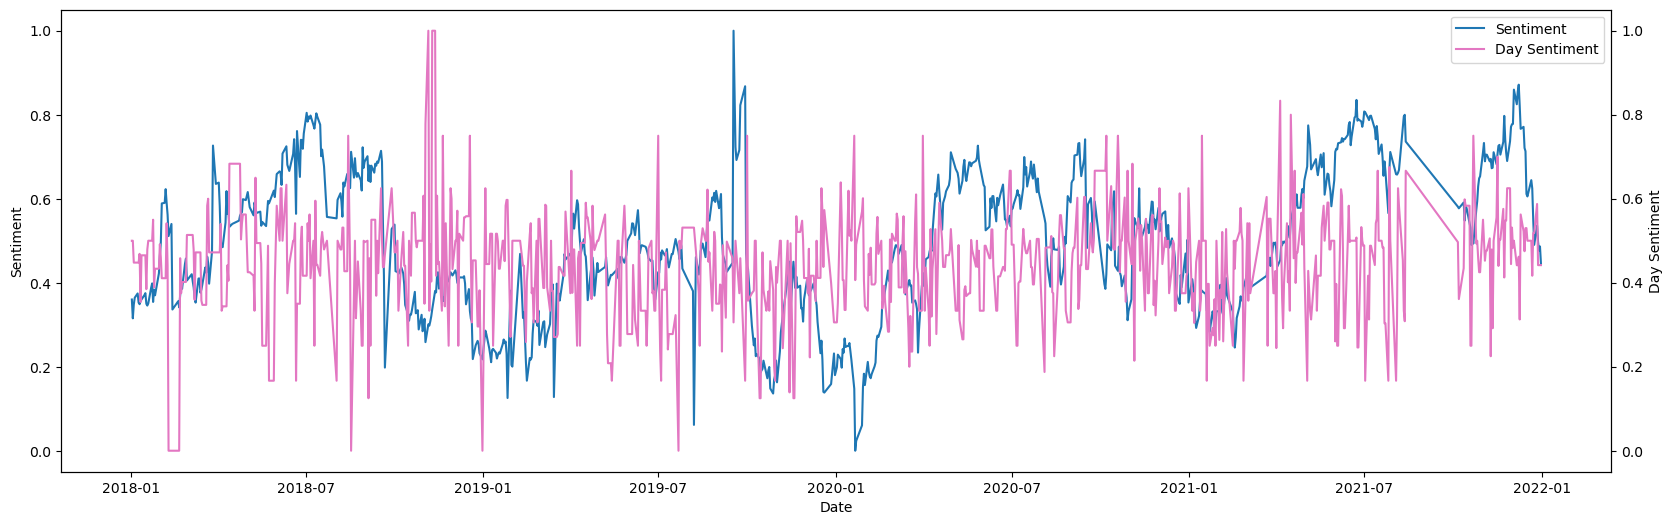

In [10]:
# Data
x = df_all['판정일']
y1 = df['도매가격']
y2 = df['day_sentiment']

# Create the first y-axis
fig, ax1 = plt.subplots(figsize=(20,6))

# Plot the first line
ax1.plot(x, y1, color='#1f77b4', label='Sentiment')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment')
ax1.tick_params(axis='y')

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the second line
ax2.plot(x, y2, color='#e377c2', label='Day Sentiment')
ax2.set_ylabel('Day Sentiment')
ax2.tick_params(axis='y')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)

# Display the plot
plt.show()

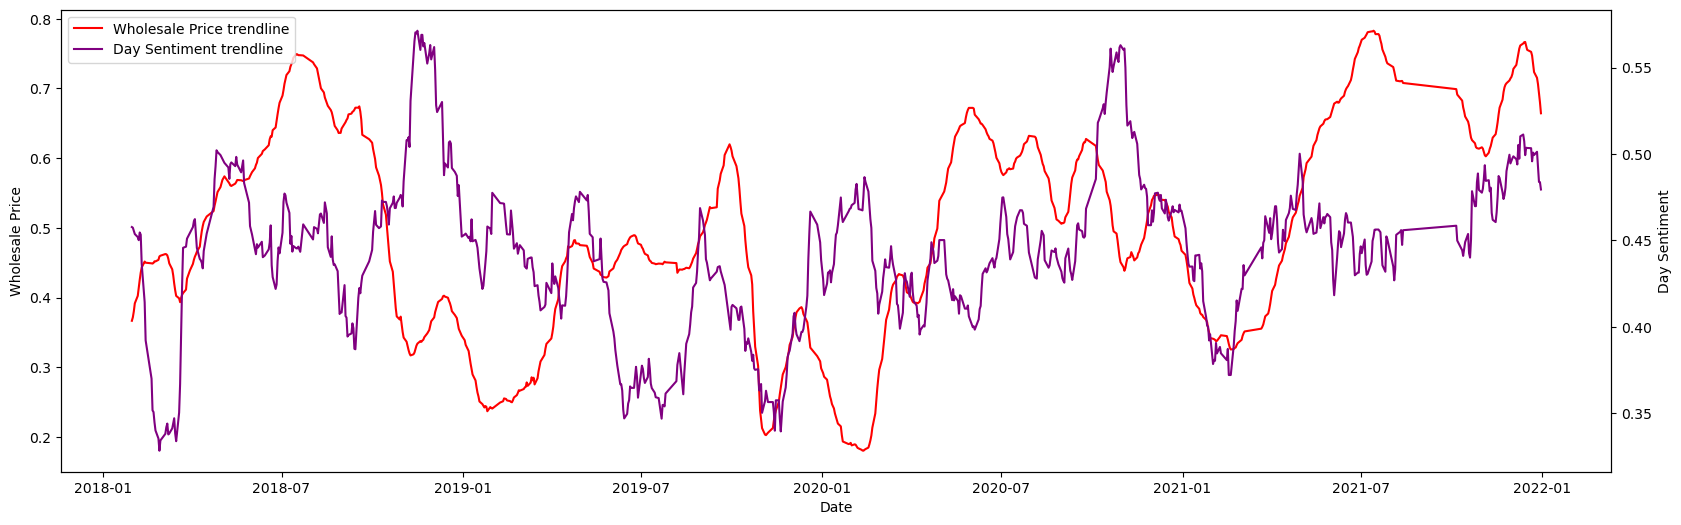

In [12]:
import matplotlib.pyplot as plt

# Data
x = df_all['판정일']
y1 = df['도매가격']
y2 = df['day_sentiment']

# Create a figure and the first set of axes
fig, ax1 = plt.subplots(figsize=(20, 6))

# Plot the first scatter plot
#ax1.scatter(x, y1, label='도매가격', marker='o')

# Calculate the rolling mean for y1 and plot the trendline
rolling_mean_y1 = y1.rolling(window=21).mean()
ax1.plot(x, rolling_mean_y1, label='Wholesale Price trendline', color='red')

ax1.set_xlabel('Date')
ax1.set_ylabel('Wholesale Price')
ax1.tick_params(axis='y')

# Create the second set of axes
ax2 = ax1.twinx()

# Plot the second scatter plot
#ax2.scatter(x, y2, label='Day Sentiment', marker='x', color='green')

# Calculate the rolling mean for y2 and plot the trendline
rolling_mean_y2 = y2.rolling(window=21).mean()
ax2.plot(x, rolling_mean_y2, label='Day Sentiment trendline', color='purple')

ax2.set_ylabel('Day Sentiment')
ax2.tick_params(axis='y')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2,loc='upper left')

# Display the plot
plt.show()
